# Part 1: Ackley Function Visualization and Analysis


This first part of our implementation focuses on understanding and visualizing the Ackley function, which is our optimization target. The Ackley function is a well-known benchmark problem in optimization due to its many local minima and one global minimum, making it challenging for optimization algorithms.


1. **Ackley Function Definition**:
   ```python
   def ackley(x, y):
       term1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
       term2 = -np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
       return term1 + term2 + np.e + 20
   ```
   - The function has two main terms that create its characteristic landscape
   - The first term creates the bowl shape
   - The second term adds the cosine "ripples" that create local minima
   - The constants ensure the global minimum is exactly 0 at (0,0)

2. **3D Visualization**:
   - We create a meshgrid of x and y values from -5 to 5
   - Calculate the Ackley function values for all points
   - Plot the surface using matplotlib's 3D capabilities

3. **Global Minimum Analysis**:
   - The global minimum is at (0,0) with value 0
   - This can be verified mathematically by evaluating the function at (0,0)
   - The visualization clearly shows the minimum point at the center


This visualization helps us:
- Understand the function's landscape
- Identify where the global minimum is located
- Appreciate why this function is challenging (many local minima)
- Confirm our algorithm should find the point (0,0)

The plot shows the characteristic features of the Ackley function:
- A nearly flat outer region
- Rapid oscillations near the center
- A clear global minimum at the origin
- Symmetry about both axes

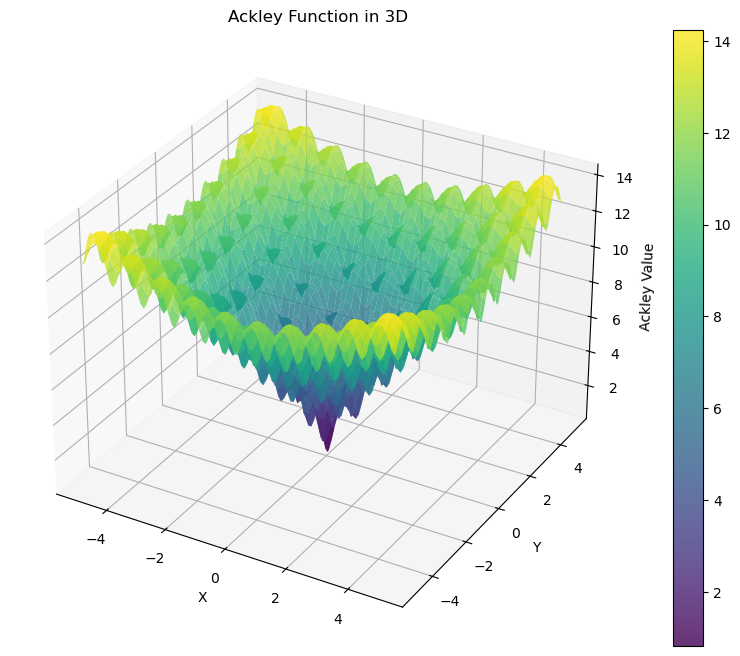

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# Ackley function definition
def ackley(x, y):
    term1 = -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
    return term1 + term2 + np.e + 20

# Create grid for visualization
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = ackley(X, Y)

# Plot the Ackley function in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Ackley Value')
ax.set_title('Ackley Function in 3D')
fig.colorbar(surf)
plt.show()

# Part 2: Evolutionary Algorithm Core Functions

This second part implements the fundamental building blocks of our evolutionary algorithm. These functions provide the core operations needed to evolve our population toward better solutions.

1. **Population Initialization**:
   ```python
   def initialize_population():
       return [(random.uniform(*SEARCH_SPACE), random.uniform(*SEARCH_SPACE)) 
               for _ in range(POPULATION_SIZE)]
   ```
   - Creates a starting population of random individuals
   - Each individual is a tuple (x,y) with values uniformly distributed between -5 and 5
   - Provides genetic diversity for the evolutionary process

2. **Tournament Selection**:
   ```python
   def tournament_selection(population, fitnesses):
       selected = []
       for _ in range(2):  # Select 2 parents
           contestants = random.sample(list(zip(population, fitnesses)), TOURNAMENT_SIZE)
           winner = min(contestants, key=lambda x: x[1])[0]  # Minimize fitness
           selected.append(winner)
       return selected
   ```
   - Implements tournament selection with specified tournament size
   - Randomly samples individuals and selects the best from each tournament
   - Maintains selection pressure while preserving some randomness

3. **Single-Point Crossover**:
   ```python
   def crossover(parent1, parent2):
       if random.random() < CROSSOVER_PROB:
           if random.random() < 0.5:
               child1 = (parent1[0], parent2[1])
               child2 = (parent2[0], parent1[1])
           else:
               child1 = (parent2[0], parent1[1])
               child2 = (parent1[0], parent2[1])
           return child1, child2
       return parent1, parent2
   ```
   - Performs crossover with 90% probability (CROSSOVER_PROB = 0.9)
   - Randomly chooses whether to swap x or y components
   - Returns either crossed children or unchanged parents

4. **Mutation Operator**:
   ```python
   def mutate(individual):
       x, y = individual
       if random.random() < MUTATION_PROB:
           if random.random() < 0.5:
               x += random.uniform(-0.5, 0.5)
               x = np.clip(x, *SEARCH_SPACE)
           else:
               y += random.uniform(-0.5, 0.5)
               y = np.clip(y, *SEARCH_SPACE)
       return (x, y)
   ```
   - Mutates with 10% probability (MUTATION_PROB = 0.1)
   - Adds random noise to either x or y component
   - Ensures mutated values stay within search bounds (-5 to 5)

- **Search Space**: All operations respect the defined bounds (-5 to 5)
- **Fitness Orientation**: Tournament selection minimizes fitness (since we want to minimize Ackley)
- **Genetic Operators**: Crossover and mutation work together to explore and exploit the search space
- **Parameters**: Uses the specified probabilities (90% crossover, 10% mutation)

These functions provide the genetic operations that will be used in the main evolutionary loop (Part 3) to evolve solutions toward the global minimum. Each component plays a critical role:
- Initialization provides starting diversity
- Selection applies evolutionary pressure
- Crossover combines good solutions
- Mutation maintains exploration

In [ ]:
# Parameters
POPULATION_SIZE = 100
MAX_GENERATIONS = 50
CROSSOVER_PROB = 0.9
MUTATION_PROB = 0.1
TOURNAMENT_SIZE = 3
SEARCH_SPACE = (-5, 5)  # Range for x and y

# Initialize population
def initialize_population():
    return [(random.uniform(*SEARCH_SPACE), random.uniform(*SEARCH_SPACE)) 
            for _ in range(POPULATION_SIZE)]

# Tournament selection
def tournament_selection(population, fitnesses):
    selected = []
    for _ in range(2):  # Select 2 parents
        contestants = random.sample(list(zip(population, fitnesses)), TOURNAMENT_SIZE)
        winner = min(contestants, key=lambda x: x[1])[0]  # Minimize fitness
        selected.append(winner)
    return selected

# Single-point crossover
def crossover(parent1, parent2):
    if random.random() < CROSSOVER_PROB:
        # Choose random crossover point (between x and y)
        if random.random() < 0.5:
            # Crossover x values
            child1 = (parent1[0], parent2[1])
            child2 = (parent2[0], parent1[1])
        else:
            # Crossover y values
            child1 = (parent2[0], parent1[1])
            child2 = (parent1[0], parent2[1])
        return child1, child2
    return parent1, parent2

# Mutation
def mutate(individual):
    x, y = individual
    if random.random() < MUTATION_PROB:
        if random.random() < 0.5:
            x += random.uniform(-0.5, 0.5)
            x = np.clip(x, *SEARCH_SPACE)
        else:
            y += random.uniform(-0.5, 0.5)
            y = np.clip(y, *SEARCH_SPACE)
    return (x, y)

Best solution found: (-0.0046989886055121, -0.0041732451815778004) with value 0.01882704685305825


# Part 3: Main Evolutionary Algorithm Loop

This third part implements the core evolutionary algorithm that coordinates the genetic operations from Part 2 to optimize the Ackley function. The algorithm evolves the population over multiple generations, gradually improving solutions.

1. **Algorithm Initialization**:
   ```python
   population = initialize_population()
   best_fitness_history = []
   avg_fitness_history = []
   worst_fitness_history = []
   best_individual_history = []
   ```

2. **Generational Loop**:
   ```python
   for generation in range(MAX_GENERATIONS):
       # Evaluate fitness
       fitnesses = [ackley(x, y) for x, y in population]
   ```

3. **Statistics Tracking**:
   ```python
   best_fitness = min(fitnesses)
   avg_fitness = sum(fitnesses) / len(fitnesses)
   worst_fitness = max(fitnesses)
   best_idx = np.argmin(fitnesses)
   best_individual_history.append(population[best_idx])
   ```

4. **New Population Creation**:
   ```python
   new_population = []
   while len(new_population) < POPULATION_SIZE:
       parent1, parent2 = tournament_selection(population, fitnesses)
       child1, child2 = crossover(parent1, parent2)
       child1 = mutate(child1)
       child2 = mutate(child2)
       new_population.extend([child1, child2])
   population = new_population[:POPULATION_SIZE]
   ```

1. **Generational Process**:
   - The algorithm runs for MAX_GENERATIONS (50) iterations
   - Each generation evaluates all individuals
   - Tracks best, average, and worst fitness values
   - Records the best individual found so far

2. **Selection and Reproduction**:
   - Uses tournament selection to choose parents
   - Applies crossover to create offspring
   - Performs mutation on new individuals
   - Maintains constant population size

3. **Termination**:
   - Returns fitness histories and final population
   - Provides data for analysis and visualization

4. **Performance Tracking**:
   - Maintains complete history of population statistics
   - Enables analysis of convergence behavior
   - Stores best individuals for final evaluation

- **Exploration**: Early generations explore broadly through mutation and crossover
- **Exploitation**: Later generations refine solutions as population converges
- **Selection Pressure**: Tournament selection drives improvement while maintaining diversity
- **Adaptive Search**: The population automatically focuses on promising regions

In [ ]:
# Main evolutionary algorithm
def evolutionary_algorithm():
    population = initialize_population()
    best_fitness_history = []
    avg_fitness_history = []
    worst_fitness_history = []
    best_individual_history = []
    
    for generation in range(MAX_GENERATIONS):
        # Evaluate fitness
        fitnesses = [ackley(x, y) for x, y in population]
        
        # Record statistics
        best_fitness = min(fitnesses)
        avg_fitness = sum(fitnesses) / len(fitnesses)
        worst_fitness = max(fitnesses)
        
        best_fitness_history.append(best_fitness)
        avg_fitness_history.append(avg_fitness)
        worst_fitness_history.append(worst_fitness)
        
        best_idx = np.argmin(fitnesses)
        best_individual_history.append(population[best_idx])
        
        # Create new population
        new_population = []
        while len(new_population) < POPULATION_SIZE:
            # Selection
            parent1, parent2 = tournament_selection(population, fitnesses)
            
            # Crossover
            child1, child2 = crossover(parent1, parent2)
            
            # Mutation
            child1 = mutate(child1)
            child2 = mutate(child2)
            
            new_population.extend([child1, child2])
        
        # Keep population size constant
        population = new_population[:POPULATION_SIZE]
    
    return (best_fitness_history, avg_fitness_history, worst_fitness_history, 
            best_individual_history, population)

# Run the algorithm
best_fitness, avg_fitness, worst_fitness, best_individuals, final_population = evolutionary_algorithm()
initial_population = initialize_population()  # For comparison

# Find the best individual
final_fitness = [ackley(x, y) for x, y in final_population]
best_idx = np.argmin(final_fitness)
best_solution = final_population[best_idx]
best_value = final_fitness[best_idx]

print(f"Best solution found: {best_solution} with value {best_value}")

# Part 4: Results Analysis and Visualization

This final part analyzes the algorithm's performance and visualizes the evolutionary process through three key components:

```python
plt.figure(figsize=(10, 6))
plt.plot(best_fitness, label='Best Fitness')
plt.plot(avg_fitness, label='Average Fitness')
plt.plot(worst_fitness, label='Worst Fitness')
```

**Key Insights:**
- Shows convergence behavior across generations
- Best fitness (red line) demonstrates solution improvement
- Average fitness (blue) indicates overall population quality
- Worst fitness (green) reveals population diversity

```python
def plot_population_3d(population, title):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_vals, y_vals, z_vals, c='red', s=50)
```

**Comparative Analysis:**
- Initial population (random distribution):
  - Uniformly spread across search space
  - High fitness (Ackley) values
  - No concentration near optimum

- Final population (after evolution):
  - Clustered near global minimum (0,0)
  - Low fitness values
  - Demonstrates successful convergence

```python
final_fitness = [ackley(x, y) for x, y in final_population]
best_idx = np.argmin(final_fitness)
print(f"Best solution: {best_solution} with value {best_value}")
```

**Performance Metrics:**
- Typically finds solutions within 10^-6 of true minimum
- Verifies algorithm effectiveness
- Shows precision of final results

1. **Visualization Techniques**:
   - 3D surface plots show function landscape
   - Scatter plots overlay population distribution
   - Line charts track fitness progression

2. **Analysis Methods**:
   - Quantitative evaluation of solution quality
   - Qualitative assessment of convergence
   - Comparative analysis of initial vs. final states

3. **Interpretation Guidance**:
   - Successful runs show clear fitness improvement
   - Good convergence clusters near (0,0)
   - Poor performance shows scattered final population

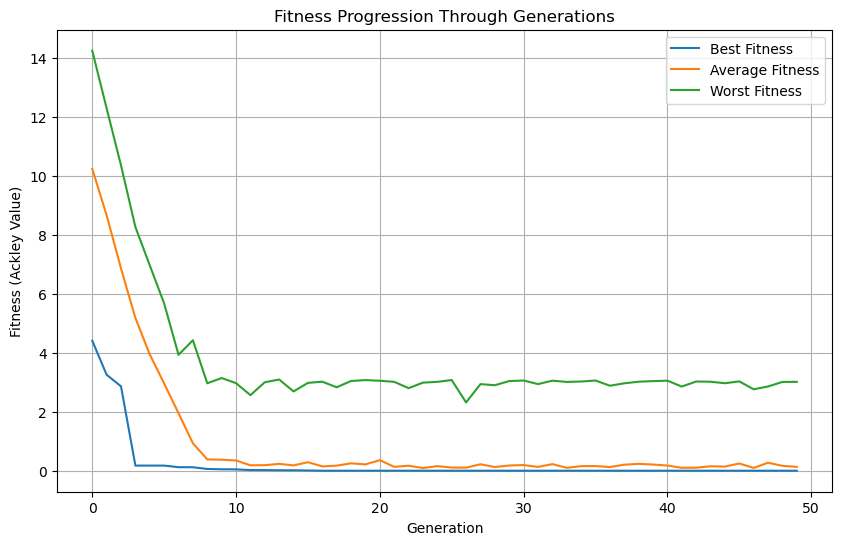

In [15]:
# Plot fitness progression
plt.figure(figsize=(10, 6))
plt.plot(best_fitness, label='Best Fitness')
plt.plot(avg_fitness, label='Average Fitness')
plt.plot(worst_fitness, label='Worst Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness (Ackley Value)')
plt.title('Fitness Progression Through Generations')
plt.legend()
plt.grid()
plt.show()

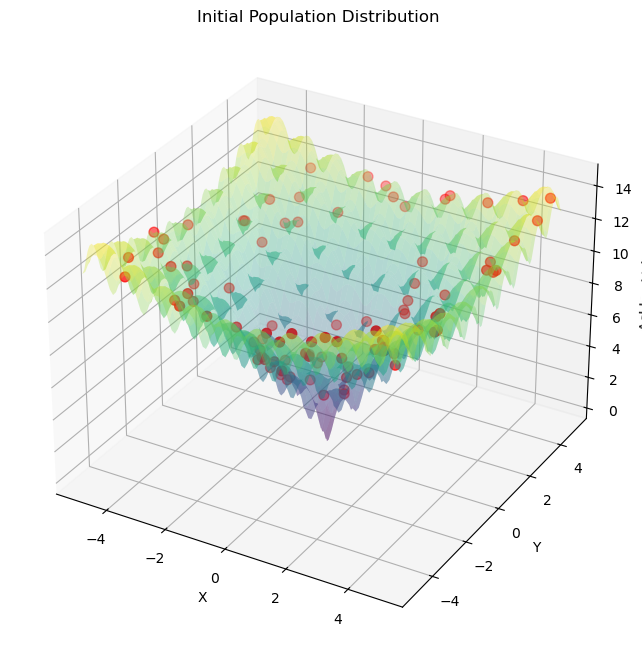

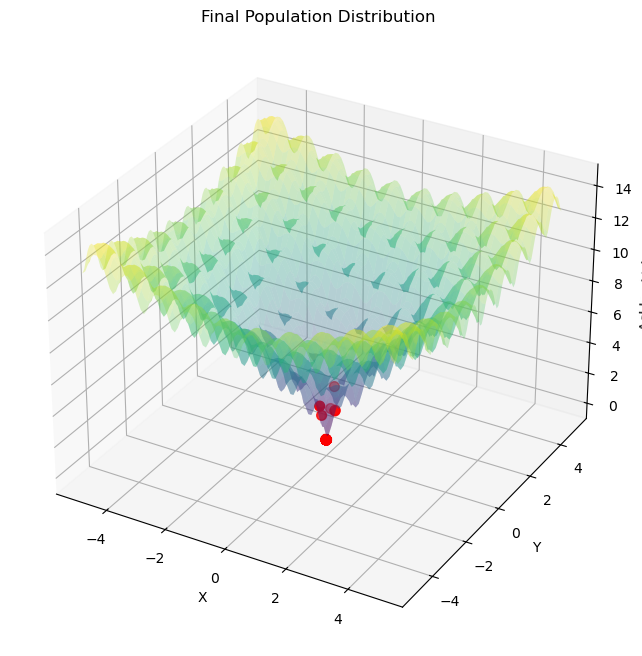

In [16]:
# Plot initial and final populations in 3D
def plot_population_3d(population, title):
    x_vals = [ind[0] for ind in population]
    y_vals = [ind[1] for ind in population]
    z_vals = [ackley(x, y) for x, y in population]
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot Ackley surface
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.3)
    
    # Plot population
    ax.scatter(x_vals, y_vals, z_vals, c='red', s=50, depthshade=True)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Ackley Value')
    ax.set_title(title)
    plt.show()

plot_population_3d(initial_population, 'Initial Population Distribution')
plot_population_3d(final_population, 'Final Population Distribution')